<a href="https://colab.research.google.com/github/MareevaMI/PDA_SOL/blob/main/hw_4_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

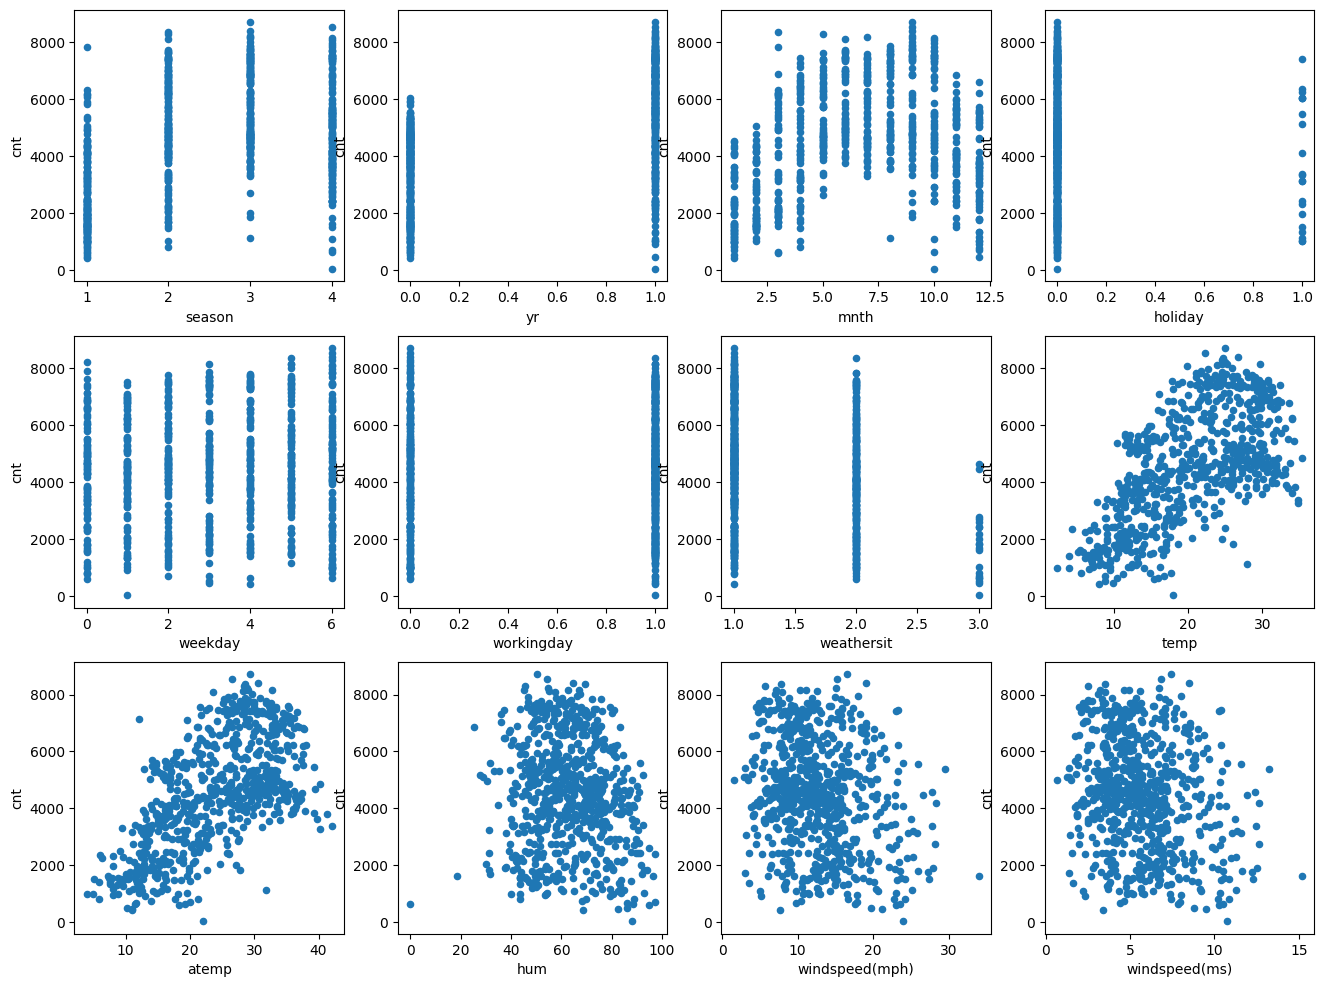

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: с мая по октябрь велосипеды берёт на прокат большее число человек, чем в остальные месяцы года. Тем не менее, даже в зимние и осенние месяцы люди могут брать напрокат до 6000 велосипедов в день (без учёта выброса значений)

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: таковыми признаками являются temp и atemp (соответственно, температура воздуха фактическая и по ощущениям). Это можно увидеть следующим образом: график поднимается от левого нижнего угла до правого верхнего, то есть выполняется зависимость "чем больше температура воздуха, тем больше велосипедов берут напрокат"

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: ключевой признак cnt (количество прокатов) больше всего коррелирует с температурой воздуха (temp и atemp; коэффициент корреляции = 0,63), а также с годом (ye = 2011/2012; коэффициент корреляции = 0,57) и сезоном (season, коэффициент корреляции = 0,41).
Меньше всего ключевой признак коррелирует с оценкой благоприятности погоды whethersit (-0,3), скоростью ветра в милях/ч windspeed(mph) (-0,23), скоростью ветра в м/с windspeed(ms) (-0,23), влажностью воздуха hum (-0,1).

<Axes: >

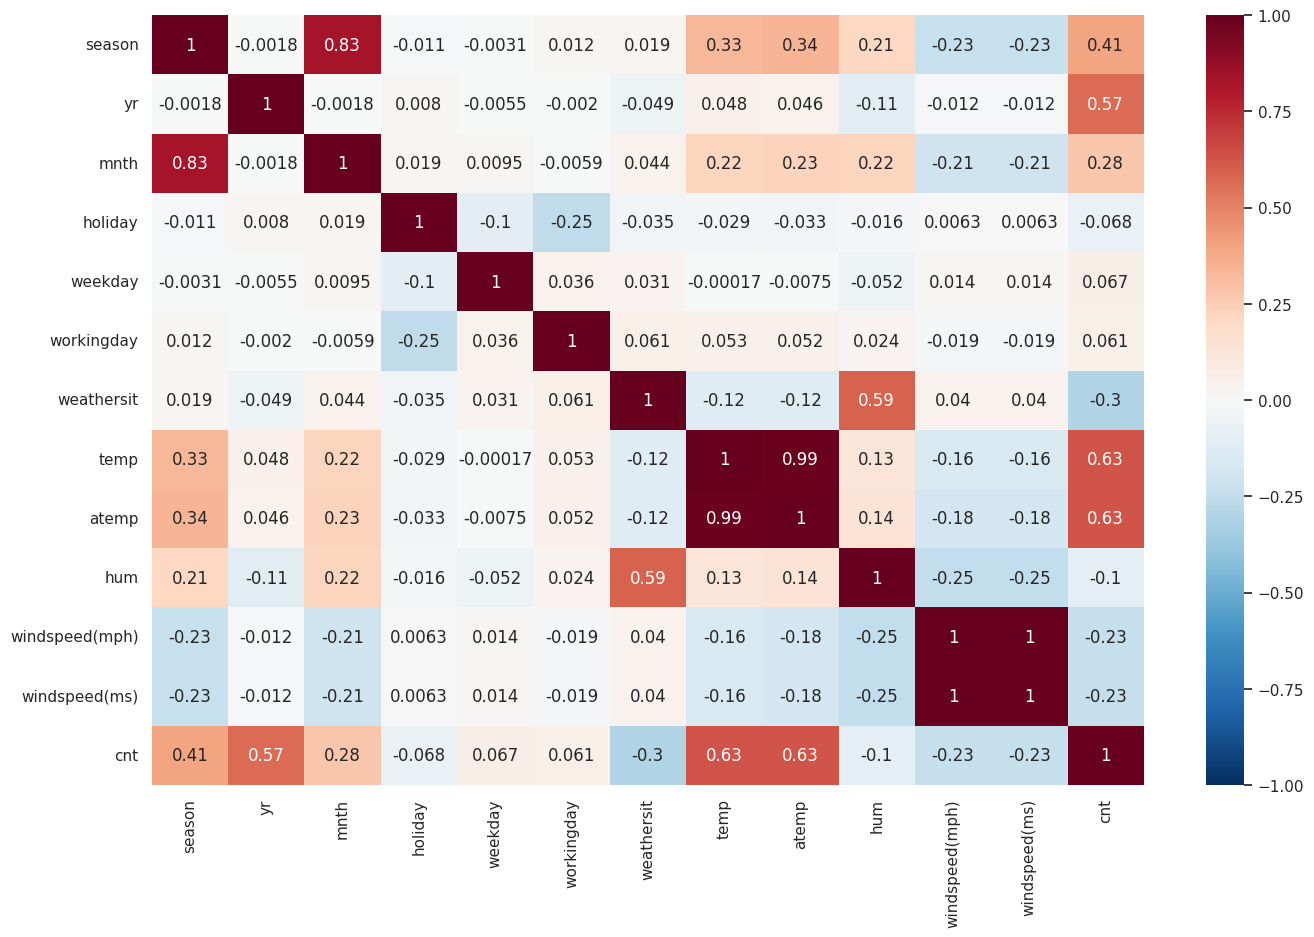

In [6]:
sns.set()
plt.figure(figsize=(16,10))
sns.heatmap(
    df.corr(),
    cmap='RdBu_r',
    annot=True,
    vmin=-1, vmax=1)

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: такая большая корреляция появилась из-за того, что мы рассматриваем период, включающий всего два года. В 2012 году прокат велосипедов заметно увеличился по сравнению с 2011 годом, что и привело к связи ключевого признака "кол-во арендованных велосипедов" и признака "год". Есди бы мы рассматривали более продолжительный период времени, коэффициент корреляции был бы заметно меньше и показывал бы, что данные признаки не сильно зависят друг от друга.

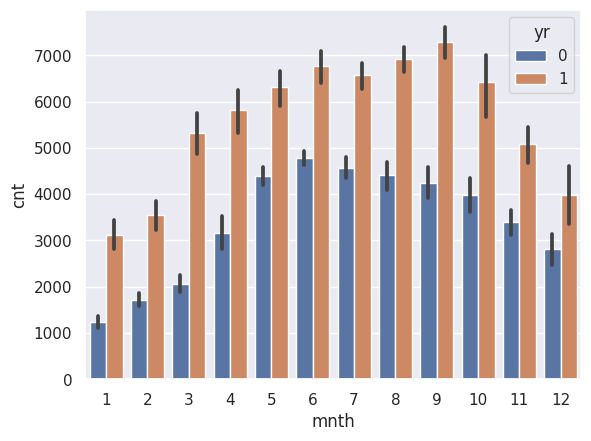

In [8]:
sns.barplot(
    x='mnth',
    y='cnt',
    data=df,
    hue='yr');

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: на первом графике видно, что количество дней недели в датасете примерно одинаковое. Это значит, что статистику собирали каждый день в течение двух лет.
    
Ответ: больше всего распределение значений признака weekday похоже на равномерное, поскольку значения для каждого из дней примерно равны.

<Axes: xlabel='weekday', ylabel='count'>

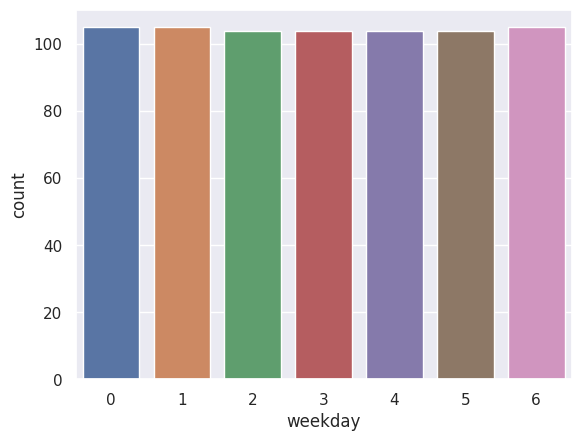

In [22]:
sns.countplot(df, x="weekday")


<Axes: xlabel='weathersit', ylabel='count'>

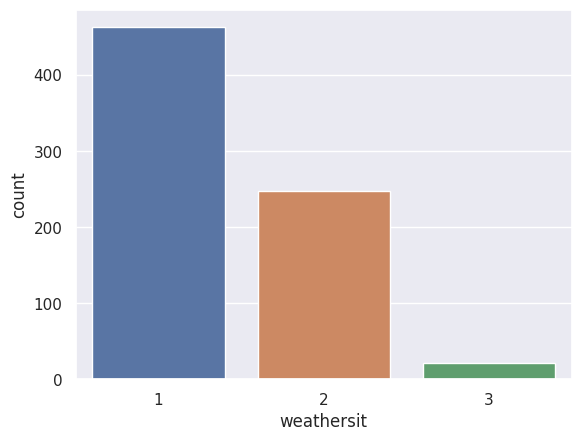

In [15]:
sns.countplot(df, x="weathersit")

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: приблизительно 4500 прокатов в день

Ответ: больше всего распределение значений ключевого признака похоже на нормальное

<Axes: xlabel='cnt', ylabel='Count'>

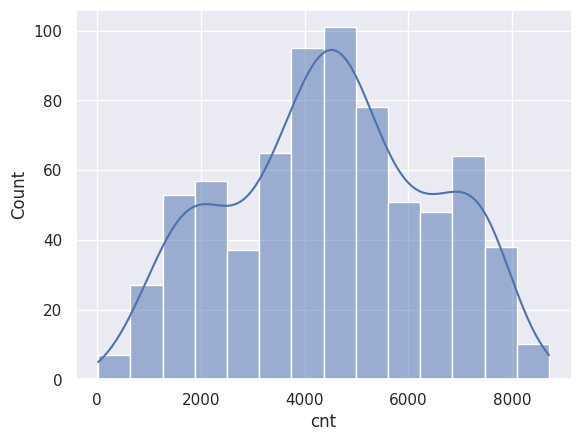

In [26]:
sns.histplot(df, x = 'cnt', kde=True)

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Во-первых, есть сильно выпадающее (аномальное) значение (temp = 30, atemp = 13). Во-вторых, люди ощущают температуру воздуха выше, чем она есть, хотя обычно в жизни происходит наоборот. В-третьих, температура воздуха только положительна, что наводит на мысль, что данные собирались в довольно теплой стране (больше как наблюдение, а не противоречие)

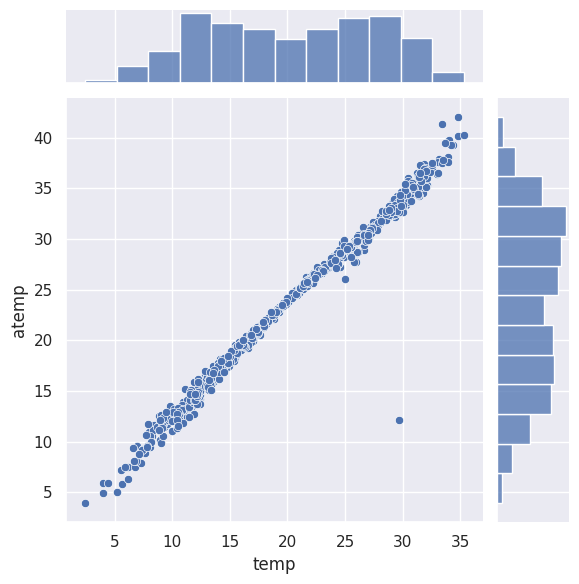

In [31]:
sns.jointplot(
    x='temp',
    y='atemp',
    data=df)

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Период с мая по август являюется предпочтительным для взятия отпусков. Поэтому люди чаще берут велосипеды в выходной день, так как позволяют погодные условия и велосипед является средством отдыха. В остальные месяцы велосипед больше выступает как средство передвижения на работу/учёбу и т.д. Поэтому люди арендуют велосипеды чаще в будние дни

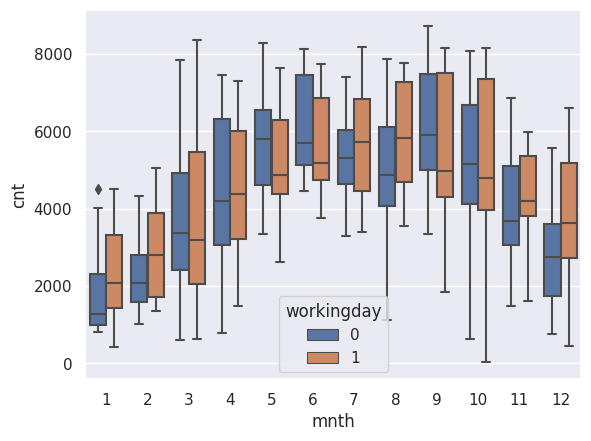

In [33]:
sns.boxplot(
    x='mnth',
    y='cnt',
    data=df,
    hue='workingday');

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: сравнивая значения двух графиков, можно сделать вывод, что при сильном ветре человеку действительно кажется, что температура воздуха на улице ниже, чем она есть на самом деле.

<Axes: xlabel='temp', ylabel='windspeed(ms)'>

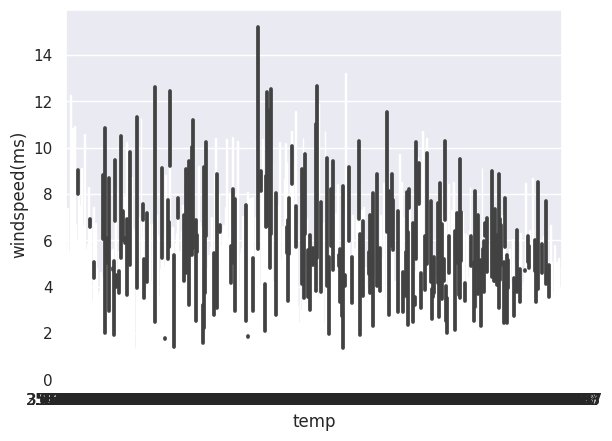

In [36]:
sns.barplot(
    x='temp',
    y='windspeed(ms)',
    data=df)

<Axes: xlabel='atemp', ylabel='windspeed(ms)'>

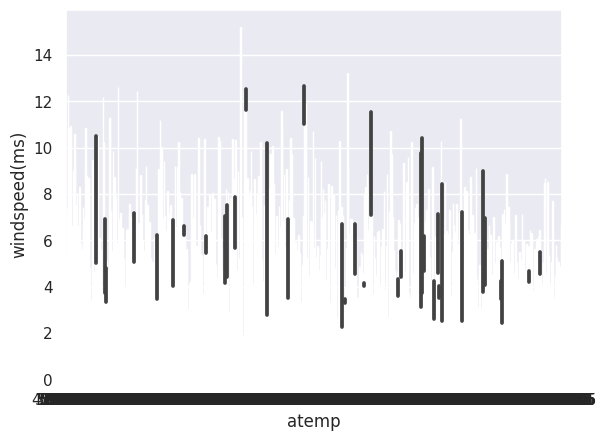

In [37]:
sns.barplot(
    x='atemp',
    y='windspeed(ms)',
    data=df)